In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import os
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

In [2]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')
df = titanic_train

In [3]:
print(df.columns)
print(df.shape)
print(df.count())
print(df.dtypes)
print(df['Sex'].head())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(891, 12)
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object


In [4]:
attrList = ['Pclass','Sex','Age','Parch','SibSp','Fare']
df = titanic_train[['Pclass','Sex','Age','Parch','SibSp','Fare','Survived']].copy()
df['Age'] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(df['Age'].values.reshape(-1, 1))
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df[attrList] = StandardScaler().fit_transform(df[attrList])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017A9B6599B0>,
      dtype=object)

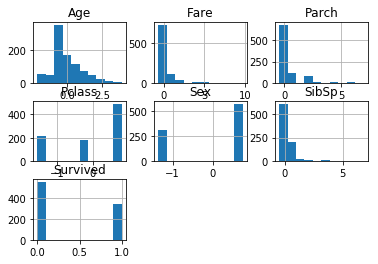

In [5]:
df.hist()

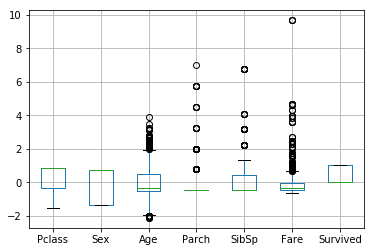

In [6]:
df.boxplot()

In [7]:
df.corr().style.background_gradient(cmap='coolwarm')

,Pclass,Sex,Age,Parch,SibSp,Fare,Survived
Pclass,1,0.1319,-0.356187,0.0184427,0.0830814,-0.5495,-0.338481
Sex,0.1319,1,0.0733768,-0.245489,-0.114631,-0.182333,-0.543351
Age,-0.356187,0.0733768,1,-0.155118,-0.232411,0.107554,-0.0528722
Parch,0.0184427,-0.245489,-0.155118,1,0.414838,0.216225,0.0816294
SibSp,0.0830814,-0.114631,-0.232411,0.414838,1,0.159651,-0.0353225
Fare,-0.5495,-0.182333,0.107554,0.216225,0.159651,1,0.257307
Survived,-0.338481,-0.543351,-0.0528722,0.0816294,-0.0353225,0.257307,1


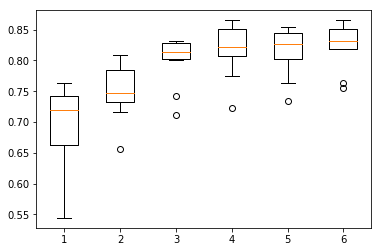

In [8]:
scoreList = []
Y = df['Survived']
for i in range(1,len(attrList)+1):
    X = pd.DataFrame(PCA(n_components=i).fit_transform(df[attrList]))
    cvScore = cross_val_score(KNeighborsClassifier(), X, Y, cv=10)
    scoreList.append(cvScore)
fig1, ax1 = plt.subplots()
ax1.boxplot(scoreList)
plt.show()

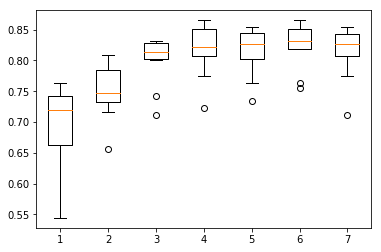

In [9]:
newList = scoreList
bagScore = cross_val_score(BaggingClassifier(KNeighborsClassifier()), X, Y, cv=10)
fig1, ax1 = plt.subplots()
newList.append(bagScore)
ax1.boxplot(newList)
plt.show()

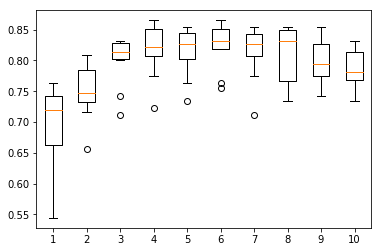

In [14]:
from sklearn.ensemble import RandomForestClassifier
newList = scoreList
forestScore = cross_val_score(RandomForestClassifier(n_estimators=10), X, Y, cv=10)
fig1, ax1 = plt.subplots()
newList.append(forestScore)
ax1.boxplot(newList)
plt.show()

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param = {'solver':['lbfgs','sgd','adam'], 'learning_rate':['constant','invscaling','adaptive']}
clf = GridSearchCV(MLPClassifier(), param, cv=10)
clf.fit(X, Y)
print(clf.best_score_)
print(clf.best_params_)

#newList = scoreList
#mlpScore = cross_val_score(MLPClassifier(), X, Y, cv=10)
#fig1, ax1 = plt.subplots()
#newList.append(mlpScore)
#ax1.boxplot(newList)
#plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

0.8170594837261503
{'learning_rate': 'invscaling', 'solver': 'adam'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [12]:
print(clf.cv_results_['mean_test_score'])
print(clf.cv_results_['params'])

[0.77665544 0.8047138  0.81369248 0.78900112 0.47811448 0.81705948
 0.77890011 0.8047138  0.80920314]
[{'learning_rate': 'constant', 'solver': 'lbfgs'}, {'learning_rate': 'constant', 'solver': 'sgd'}, {'learning_rate': 'constant', 'solver': 'adam'}, {'learning_rate': 'invscaling', 'solver': 'lbfgs'}, {'learning_rate': 'invscaling', 'solver': 'sgd'}, {'learning_rate': 'invscaling', 'solver': 'adam'}, {'learning_rate': 'adaptive', 'solver': 'lbfgs'}, {'learning_rate': 'adaptive', 'solver': 'sgd'}, {'learning_rate': 'adaptive', 'solver': 'adam'}]
